In [2]:
#Import the Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report,confusion_matrix

In [3]:
#Load the data sets- train and test 
df=pd.read_csv('train.csv')

In [4]:
#Look at top values of train data 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Print the column names of train data
print("column names of data ", df.columns.to_list())

column names of data  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [6]:
print("column names of data ", df.columns)

column names of data  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [11]:
#Print the dimension of train and test data

x=df.drop("Survived" , axis=1)
y=df["Survived"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print("Train features shape(x_train):",x_train.shape)
print("Train labels shape(y_train):",y_train.shape)
print("Test features shape(x_test):",x_test.shape)
print("Test labels shape(y_test):",y_test.shape)

Train features shape(x_train): (623, 11)
Train labels shape(y_train): (623,)
Test features shape(x_test): (268, 11)
Test labels shape(y_test): (268,)


In [12]:
#Print the number of missing values in each column of train and test data
print("Missing values in x_train:")
print(x_train.isnull().sum())
print("Missing values in x_test:")
print(x_test.isnull().sum())
print("Missing values in y_train:")
print(y_train.isnull().sum())
print("Missing values in y_test:")
print(x_test.isnull().sum())





Missing values in x_train:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age            124
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          484
Embarked         1
dtype: int64
Missing values in x_test:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             53
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          203
Embarked         1
dtype: int64
Missing values in y_train:
0
Missing values in y_test:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             53
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          203
Embarked         1
dtype: int64


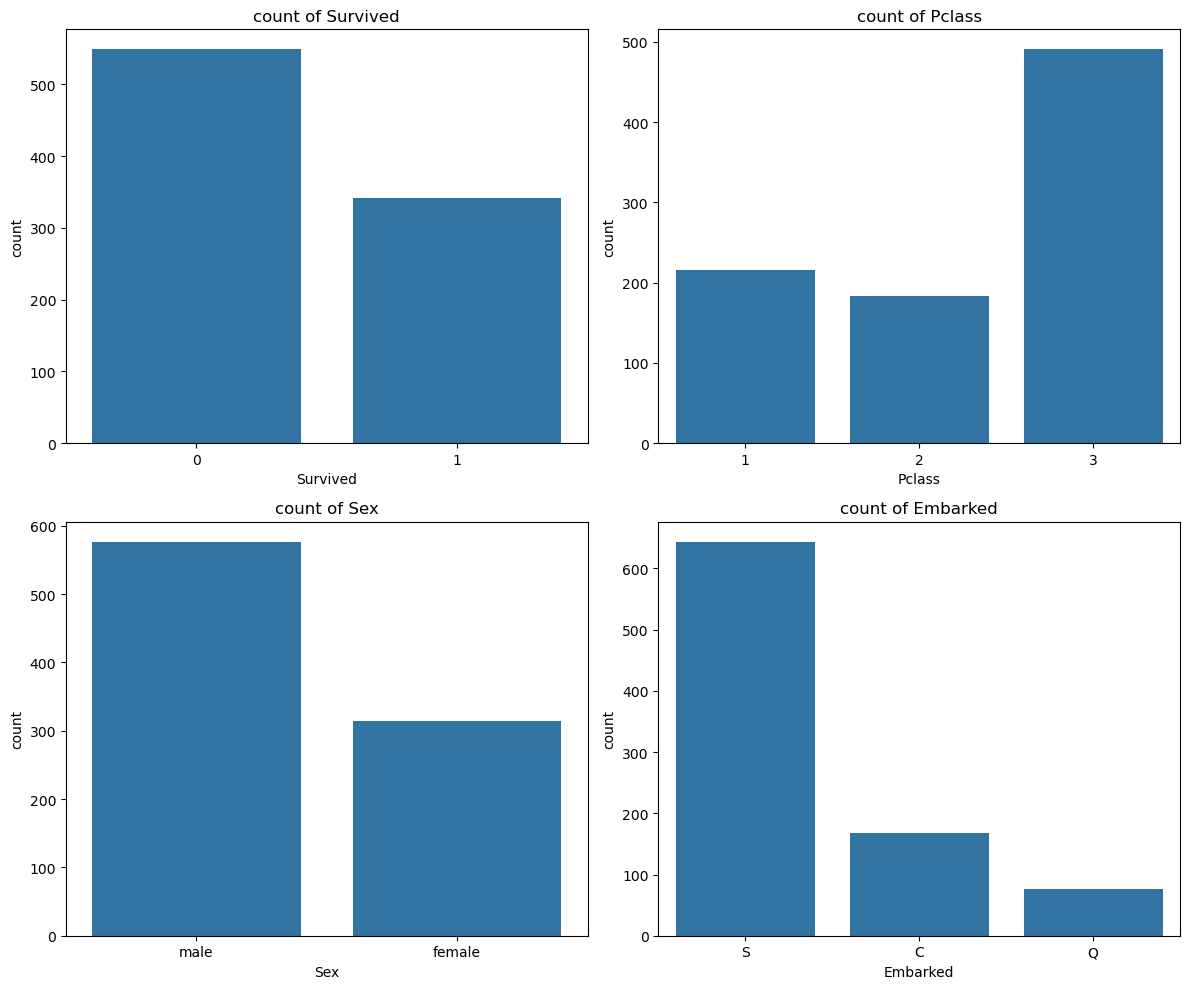

In [14]:
#Barchart of Survived, Pclass, Sex, Embarked
fig, axes=plt.subplots(2,2,figsize=(12,10))
axes=axes.flatten()
cols=['Survived', 'Pclass', 'Sex', 'Embarked']
for i,col in enumerate(cols):
    sn.countplot(data=df,x=col, ax=axes[i])
    axes[i].set_title(f'count of {col}')
plt.tight_layout()
plt.show()


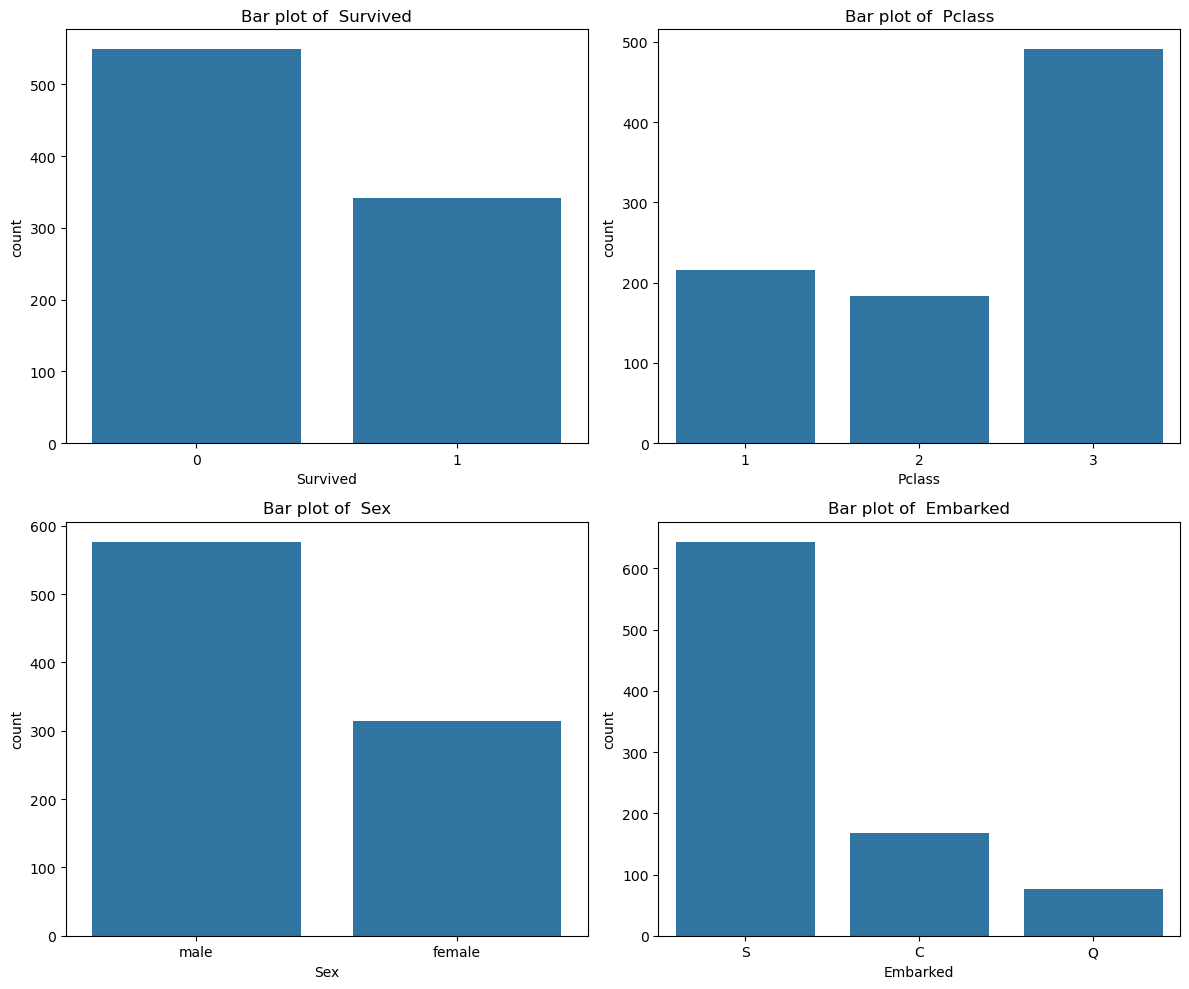

In [16]:
# using same bar plot instead of count plot
fig,axes=plt.subplots(2,2,figsize=(12,10))
axes=axes.flatten()
cols=['Survived', 'Pclass', 'Sex', 'Embarked']
for i,col in enumerate(cols):
    col_count=df[col].value_counts().reset_index()
    sn.barplot(data=col_count,x=col,y='count',ax=axes[i])
    axes[i].set_title(f'Bar plot of  {col}')
plt.tight_layout()
plt.show()

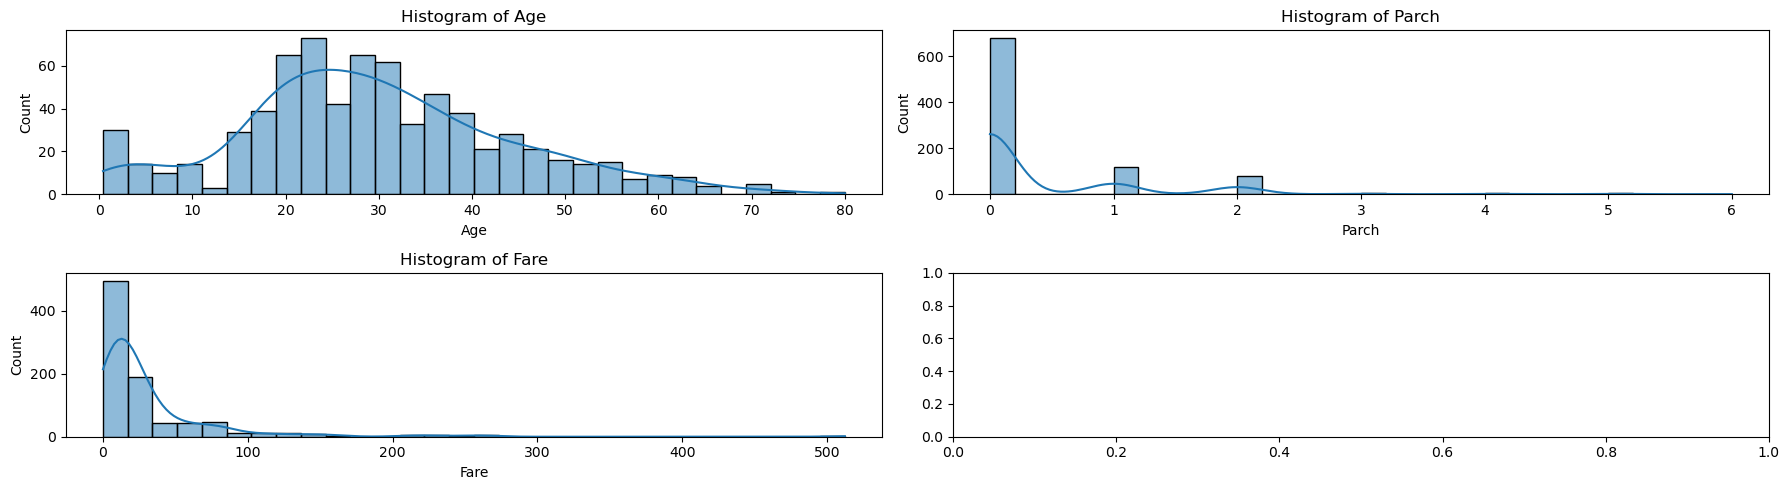

In [18]:
#Histogram of Age, Parch, Fare
cols=['Age', 'Parch', 'Fare']
fig,axes=plt.subplots(2,2,figsize=(18,5))
axes=axes.flatten()
for i,col in enumerate(cols):
    sn.histplot(data=df,x=col,bins=30,kde=True,ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

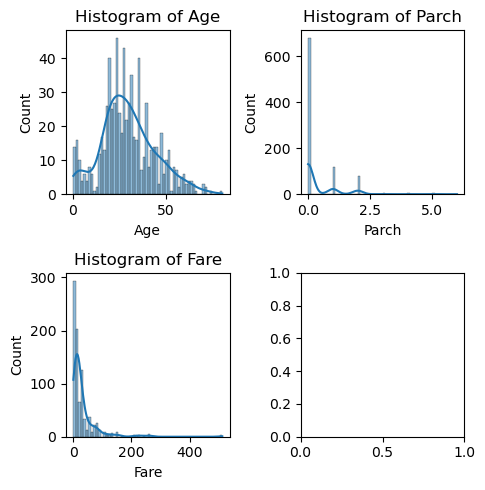

In [21]:
#Histogram of Age, Parch, Fare
cols=['Age', 'Parch', 'Fare']
fig,axes=plt.subplots(2,2,figsize=(5,5))
axes=axes.flatten()
for i,col in enumerate(cols):
    sn.histplot(data=df,x=col,bins=60,kde=True,ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

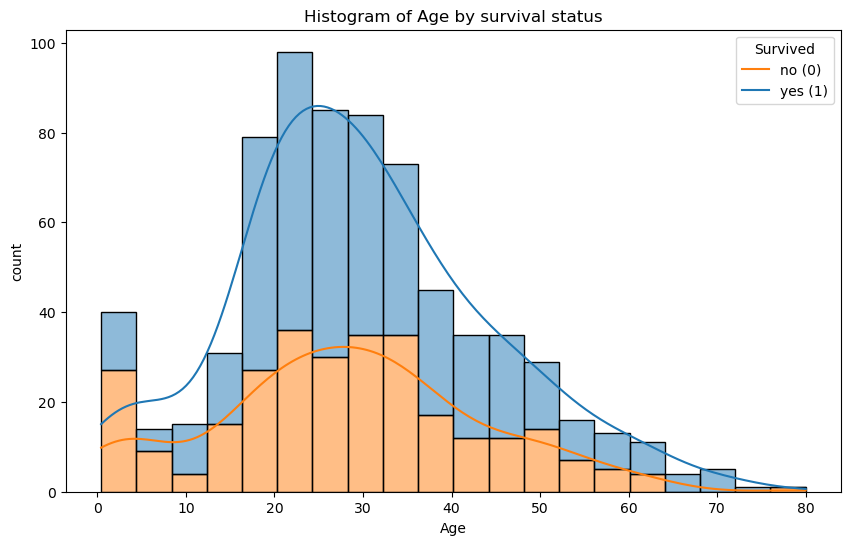

In [24]:
#Plot histogram of age for survived and did not survived class
plt.figure(figsize=(10,6))
sn.histplot(data=df,x="Age",bins=20,hue="Survived",kde=True,multiple='stack')
plt.title("Histogram of Age by survival status")
plt.xlabel('Age')
plt.ylabel('count')
plt.legend(title='Survived' ,labels=['no (0)','yes (1)'])
plt.show()

Text(0.5, 1.0, 'Histogram of Age by survival status')

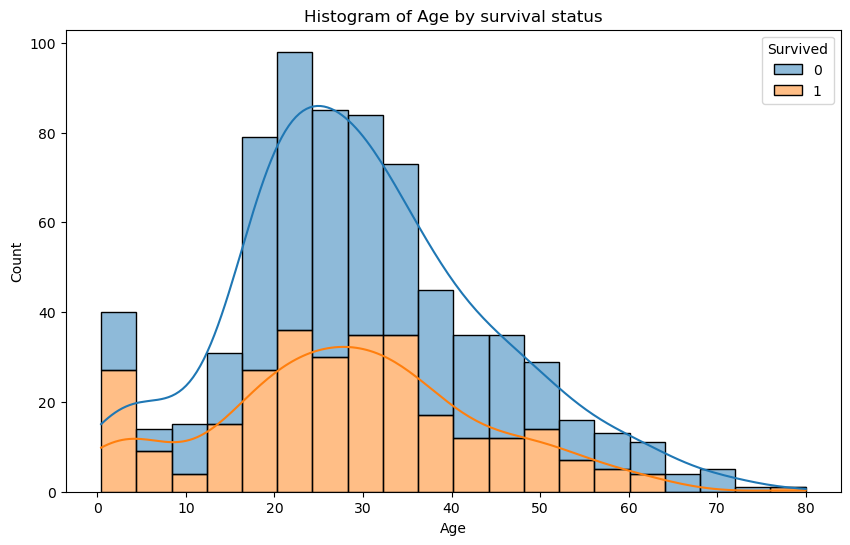

In [25]:
plt.figure(figsize=(10,6))
sn.histplot(data=df,x="Age",bins=20,hue="Survived",kde=True,multiple='stack')
plt.title("Histogram of Age by survival status")

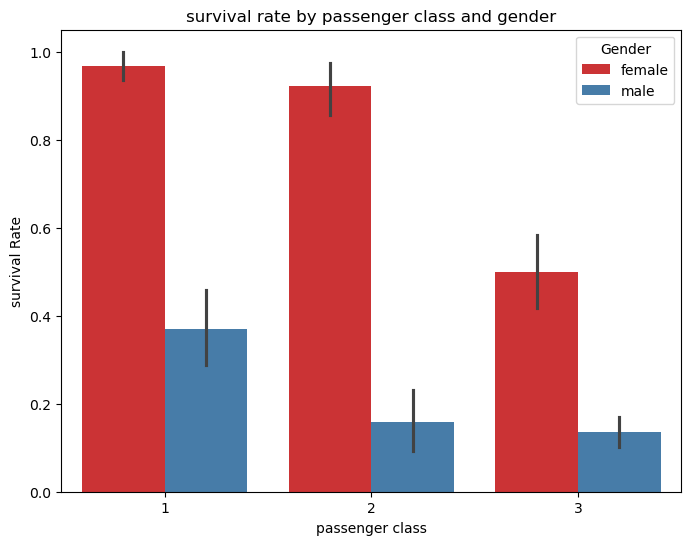

In [28]:
#Count class and gender wise survival rate - plot with appropriate chart
plt.figure(figsize=(8,6))
sn.barplot(data=df,x="Pclass",y="Survived",hue="Sex",palette='Set1')
plt.title('survival rate by passenger class and gender')
plt.xlabel('passenger class')
plt.ylabel('survival Rate')
plt.legend(title='Gender')
plt.show()

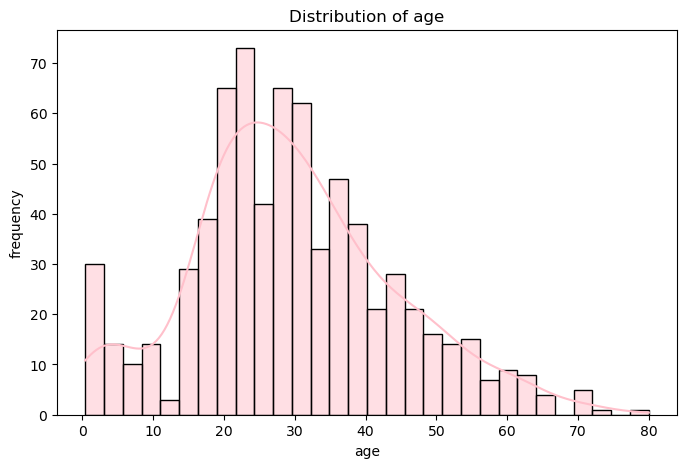

In [31]:
#Histogram of Age of the given data set(sample)
plt.figure(figsize=(8,5))
sn.histplot(data=df,x='Age',bins=30,kde=True,color='pink')
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('Distribution of age')
plt.show()

In [33]:
#Replace the msiing values in Embarked column by 'S'
df['Embarked'].fillna('S',inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
#Impute the missing values in Fare column with median value
df['Fare'].fillna(df['Fare'].median(),inplace=True)
df.isnull().sum()

/tmp/ipykernel_4284/1612204353.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(),inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [37]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
import numpy as np

# Get the mean and standard deviation of the existing (non-null) Age values
age_mean = df['Age'].mean()
age_std = df['Age'].std()

# Find the number of missing Age values
num_missing = df['Age'].isnull().sum()

# Generate random ages from a normal distribution with same mean & std
random_ages = np.random.normal(loc=age_mean, scale=age_std, size=num_missing)

# Make sure the random ages are positive (age can't be negative)
random_ages = np.abs(random_ages)

# Fill missing Age values with these random numbers
df.loc[df['Age'].isnull(), 'Age'] = random_ages

# Optionally, convert Age to integer
df['Age'] = df['Age'].astype(int)

# Check result
print(df['Age'].isnull().sum())  # Should be 0
print(age_mean,age_std)

0
29.681257014590347 14.295024552531043
